### **Exploração Inicial**

Nesta etapa, realizamos a exploração inicial do **GHPR_dataset** com os seguintes objetivos:

- **Coleta e inspeção** do dataset GHPR_dataset.  
- **Tratamento de dados** ausentes, inconsistentes e outliers.  
- **Análise estatística descritiva**: médias, medianas e medidas de dispersão.  
- **Identificação de correlações e padrões** relevantes entre as variáveis.  
- **Geração de visualizações preliminares** para embasar as próximas decisões de modelagem.  

---

O propósito desta fase é **garantir a qualidade e a confiabilidade dos dados**, fornecendo uma base sólida para a etapa de **modelagem preditiva**.

In [3]:
%pip install pandas matplotlib seaborn numpy

# Imports principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [4]:
url = "https://raw.githubusercontent.com/feiwww/GHPR_dataset/refs/heads/master/baseline.csv"
df = pd.read_csv(url)

# Visualizar primeiras linhas
df.head()

,SHA,cbo,wmc,dit,rfc,lcom,totalMethods,totalFields,nosi,loc,...,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocks,uniqueWordsQty,defect
0,7a955fd6c7de2bd912be544dcfe77f9173a7aa600,5,60,2,55,189,27,5,30,247,...,4,2,47,9,27,5,17,3,191,0
1,000f1ab4780fc9460975791c52597f7c04e15be70,3,10,1,1,9,7,4,1,38,...,0,0,0,22,4,0,4,2,69,0
2,000f1ab4780fc9460975791c52597f7c04e15be71,3,10,1,1,9,7,4,0,38,...,0,0,0,22,4,0,4,2,69,1
3,0024dbdd6ba3cc7797cc0b1ae537dcdc488c4c270,20,59,3,63,189,24,9,4,262,...,0,6,6,14,45,8,41,4,222,0
4,0024dbdd6ba3cc7797cc0b1ae537dcdc488c4c271,21,58,2,61,189,24,9,0,260,...,0,6,6,14,45,8,41,4,222,1


### **Dicionário de Métricas – GHPR_dataset**

Este dicionário apresenta a descrição das métricas extraídas do **GHPR_dataset**, traduzidas para o português:

- **CBO (Coupling Between Objects)** – Mede o **acoplamento entre objetos**, contando o número de dependências que uma classe possui.  
- **WMC (Weight Method Class / McCabe’s Complexity)** – Mede a **complexidade ciclomática** de uma classe, contando a quantidade de instruções de desvio/ramificação.  
- **DIT (Depth Inheritance Tree)** – Profundidade da **árvore de herança**, contando o número de "pais" que uma classe possui. Todas têm pelo menos 1 (herdam de `java.lang.Object`).  
- **RFC (Response For a Class)** – Conta o número de **invocações únicas de métodos** em uma classe.  
- **LCOM (Lack of Cohesion of Methods)** – Mede a **falta de coesão entre métodos** de uma classe.  
- **totalMethods** – Número total de **métodos declarados** em uma classe.  
- **totalFields** – Número total de **atributos/variáveis de instância** em uma classe.  
- **NOSI (Number of Static Invocations)** – Quantidade de **invocações a métodos estáticos**.  
- **LOC (Lines of Code)** – Contagem de **linhas de código**, ignorando linhas em branco.  
- **returnQty** – Número de **instruções `return`**.  
- **loopQty** – Número de **estruturas de repetição** (`for`, `while`, `do while`, `foreach`).  
- **comparisonsQty** – Número de **comparações lógicas** (`==`, `!=`).  
- **tryCatchQty** – Número de **estruturas `try/catch`**.  
- **parenthesizedExpsQty** – Número de **expressões entre parênteses**.  
- **stringLiteralsQty** – Número de **literais do tipo string** (ex.: `"Exemplo"`).  
- **numbersQty** – Número de **literais numéricos** (ex.: `int`, `double`, `float`).  
- **assignmentsQty** – Número de **atribuições de variáveis**.  
- **mathOperationsQty** – Número de **operações matemáticas** (`+`, `-`, `*`, `/`, `%`, `<<`, `>>`).  
- **variablesQty** – Quantidade de **variáveis declaradas**.  
- **maxNestedBlocks** – Profundidade máxima de **blocos de código aninhados**.  
- **uniqueWordsQty** – Quantidade de **palavras únicas** presentes no código-fonte.  

---

Esse dicionário serve como referência para a análise exploratória e para a interpretação dos resultados na fase de **modelagem preditiva**.


### **Análise Exploratória de Dados (AED)**

Nesta etapa do projeto será realizada propiamente a **análise exploratória do GHPR_dataset**, com o objetivo de compreender a estrutura dos dados, avaliar sua qualidade e gerar insights preliminares que apoiarão a construção do modelo preditivo.

As principais atividades incluem:

1. **Estrutura e estatísticas básicas**  
   - Inspeção do dataset (`df.info()` e `df.describe()`), verificando os tipos de dados, estatísticas descritivas e dimensões.  

2. **Qualidade dos dados**  
   - Verificação de valores ausentes e duplicados.  
   - Aplicação de imputação ou correções, caso necessário.  

3. **Distribuição da variável alvo (`defect`)**  
   - Análise da proporção entre classes com defeito e sem defeito.  
   - Identificação de possível desbalanceamento.  

4. **Correlação entre variáveis**  
   - Cálculo da matriz de correlação entre todas as métricas.  
   - Identificação de quais variáveis apresentam maior relação com a ocorrência de defeitos.  

5. **Distribuição das métricas de software**  
   - Visualização da distribuição de variáveis-chave (`loc`, `cbo`, `wmc`, `rfc`, `lcom`).  
   - Análise de presença de **outliers** e enviesamento nas distribuições.  

6. **Relação entre métricas e defeitos**  
   - Uso de boxplots e gráficos de dispersão para verificar como determinadas métricas (ex.: `LOC`, `WMC`, `RFC`) se comportam em relação à presença ou ausência de defeitos.  

---


In [5]:
# Estrutura do dataset
df.info()

# Estatísticas descritivas
df.describe(include="all")

# Dimensão
print("Linhas:", df.shape[0], "Colunas:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SHA                   6052 non-null   object
 1   cbo                   6052 non-null   int64 
 2   wmc                   6052 non-null   int64 
 3   dit                   6052 non-null   int64 
 4   rfc                   6052 non-null   int64 
 5   lcom                  6052 non-null   int64 
 6   totalMethods          6052 non-null   int64 
 7   totalFields           6052 non-null   int64 
 8   nosi                  6052 non-null   int64 
 9   loc                   6052 non-null   int64 
 10  returnQty             6052 non-null   int64 
 11  loopQty               6052 non-null   int64 
 12  comparisonsQty        6052 non-null   int64 
 13  tryCatchQty           6052 non-null   int64 
 14  parenthesizedExpsQty  6052 non-null   int64 
 15  stringLiteralsQty     6052 non-null   

In [6]:
# Contar valores nulos
print(df.isnull().sum())

# Remover duplicados
df = df.drop_duplicates()

# Exemplo de imputação (se tiver valores numéricos faltando)
df.fillna(df.median(numeric_only=True), inplace=True)

SHA                     0
cbo                     0
wmc                     0
dit                     0
rfc                     0
lcom                    0
totalMethods            0
totalFields             0
nosi                    0
loc                     0
returnQty               0
loopQty                 0
comparisonsQty          0
tryCatchQty             0
parenthesizedExpsQty    0
stringLiteralsQty       0
numbersQty              0
assignmentsQty          0
mathOperationsQty       0
variablesQty            0
maxNestedBlocks         0
uniqueWordsQty          0
defect                  0
dtype: int64


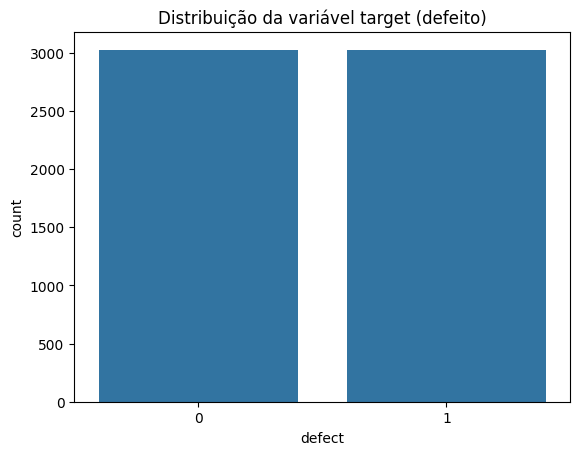

defect
0    50.0
1    50.0
Name: proportion, dtype: float64


In [7]:
sns.countplot(x="defect", data=df)
plt.title("Distribuição da variável target (defeito)")
plt.show()

# Percentual de cada classe
print(df["defect"].value_counts(normalize=True) * 100)


defect                  1.000000
cbo                     0.063791
lcom                   -0.000067
mathOperationsQty      -0.000884
stringLiteralsQty      -0.000951
totalMethods           -0.001163
totalFields            -0.001174
parenthesizedExpsQty   -0.001409
returnQty              -0.001531
tryCatchQty            -0.001601
loopQty                -0.001690
loc                    -0.001963
numbersQty             -0.001978
variablesQty           -0.002258
assignmentsQty         -0.002284
wmc                    -0.002313
uniqueWordsQty         -0.002533
comparisonsQty         -0.002773
maxNestedBlocks        -0.004382
rfc                    -0.023443
dit                    -0.066680
nosi                   -0.167073
Name: defect, dtype: float64


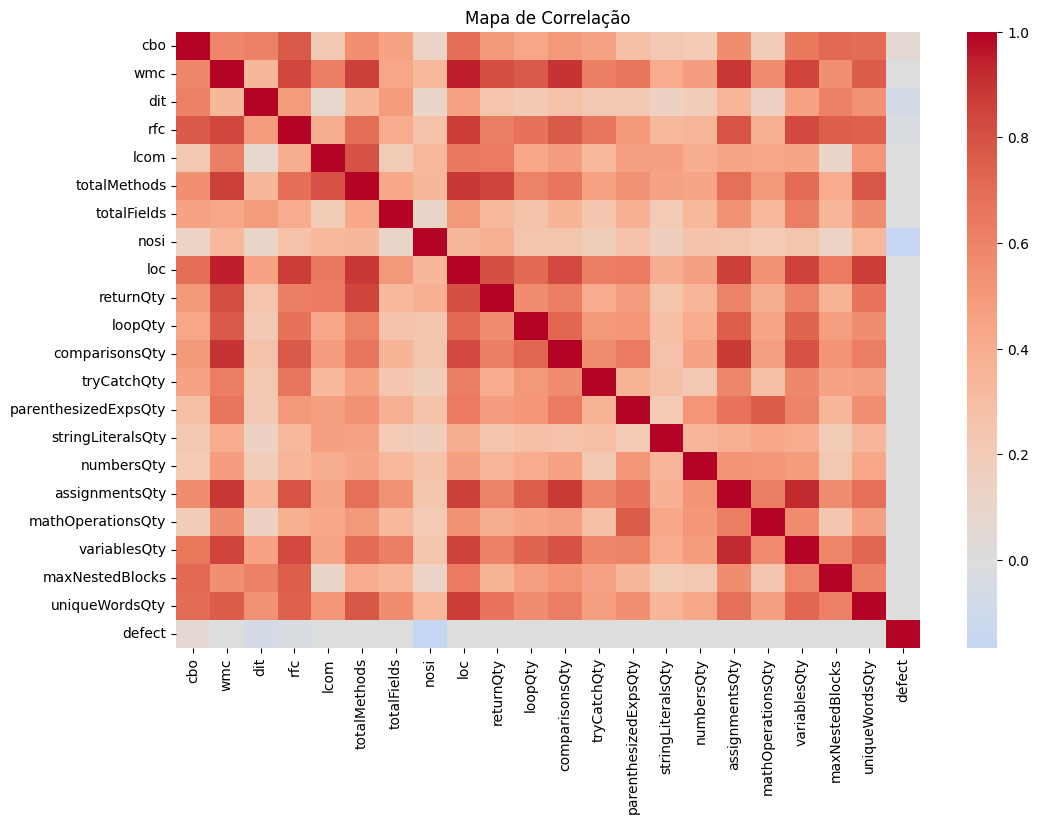

In [8]:
corr = df.corr(numeric_only=True)

# Correlação das features com "defect"
corr_target = corr["defect"].sort_values(ascending=False)
print(corr_target)

# Heatmap geral
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Mapa de Correlação")
plt.show()


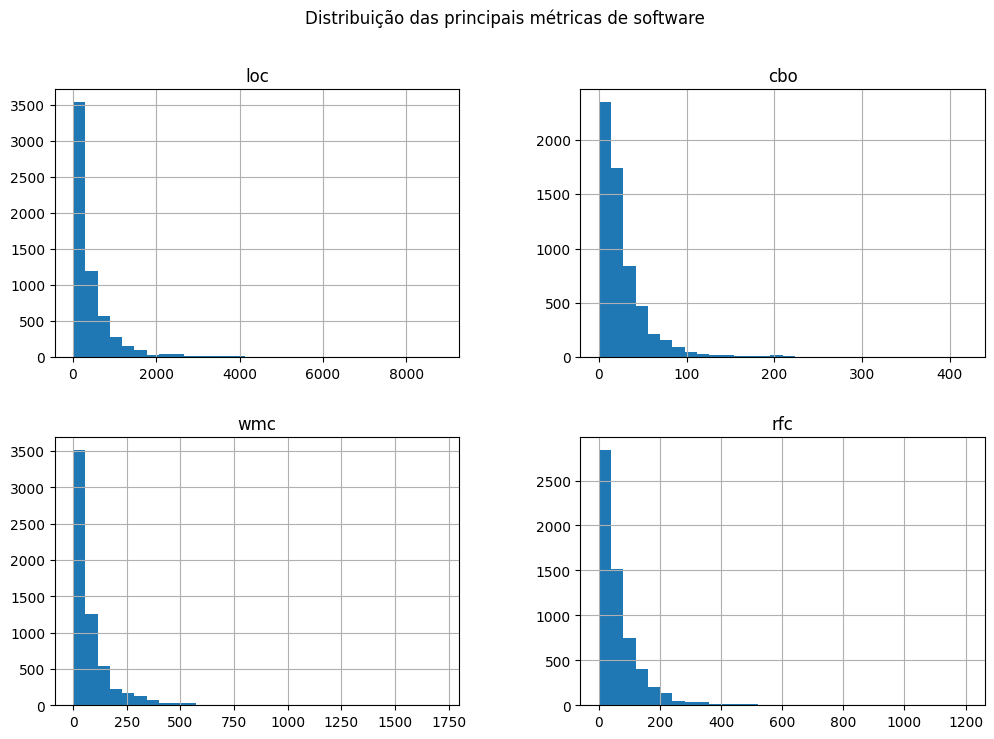

In [9]:
# Histograma geral de algumas métricas
df[["loc","cbo","wmc","rfc"]].hist(bins=30, figsize=(12,8))
plt.suptitle("Distribuição das principais métricas de software")
plt.show()

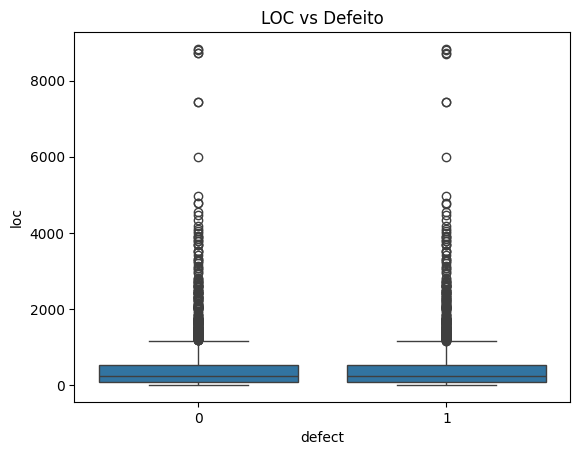

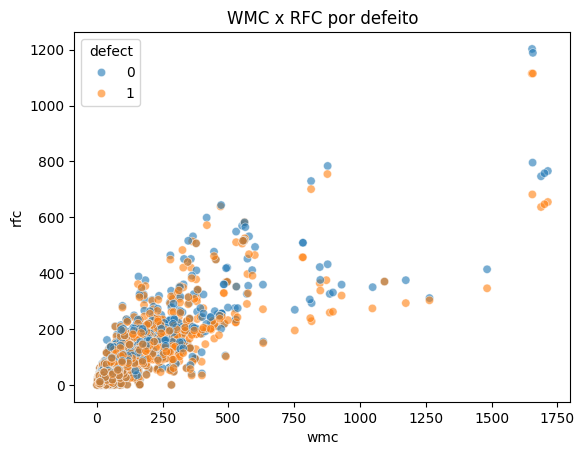

In [10]:
# Boxplot loc x defeito
sns.boxplot(x="defect", y="loc", data=df)
plt.title("LOC vs Defeito")
plt.show()

# Comparação em scatter
sns.scatterplot(x="wmc", y="rfc", hue="defect", data=df, alpha=0.6)
plt.title("WMC x RFC por defeito")
plt.show()


### **Conclusão**

#### **1. Qualidade do Dataset**
- **Nenhum valor ausente** (todas as 23 colunas estão completas).  
- **Sem duplicados aparentes** (pelo `SHA` como identificador).  
➡️ Isso facilita o pré-processamento.

---

#### **2. Variável Target (`defect`)**
- Distribuição **equilibrada** (≈ 50% defeito e 50% não defeito).  
- Não é necessário aplicar técnicas de **balanceamento** (como SMOTE/undersampling) por enquanto.  

---

#### **3. Distribuição das Features**
- Métricas como `loc`, `cbo`, `wmc`, `rfc`, `lcom` apresentam **distribuição altamente enviesada à direita** (*right-skewed*), com **muitos outliers**.  
- Exemplo: `lcom` chega a valores acima de 200k, enquanto a maioria está próxima de 0.  
➡️ Isso sugere que **normalização ou transformações** (ex.: `log1p`) podem ser úteis para modelagem preditiva.

---

#### **4. Outliers**
- Boxplots mostram **muitos valores extremos**, especialmente em `loc` e `lcom`.  
- Esses outliers podem representar **classes muito grandes/complexas** no código, mas também podem distorcer modelos baseados em distância (ex.: KNN, SVM).  
➡️ Estratégia:  
  - Manter para modelos baseados em árvores (Random Forest, XGBoost).  
  - Considerar **winsorization/transformação** para regressões.

---

#### **5. Correlação**
- Nenhuma métrica isolada tem **forte correlação linear** com `defect`.  
- As mais relevantes foram:
  - **cbo (0.06)** → acoplamento ligeiramente associado a mais defeitos.  
  - **nosi (-0.16)** → classes com mais filhos podem estar menos associadas a defeitos.  
- Outras ficaram próximas de zero, sugerindo que o problema é **não linear** e exige **modelos mais complexos** (árvores, ensembles).  

---

#### **6. Insights Preliminares**
- Como não há uma única variável dominante, o modelo precisará considerar **interações entre múltiplas métricas**.  
- Modelos baseados em **árvores de decisão** (Random Forest, XGBoost) são fortes candidatos.  
- Como as distribuições são muito assimétricas, pode ser útil:
  - Testar **transformações log** em métricas contínuas.  
  - Avaliar **feature importance** após treino inicial para guiar seleção de variáveis.  

---

O dataset está **limpo e balanceado**, mas com **muitas features enviesadas e cheias de outliers**.  
A modelagem deverá considerar isso e provavelmente se beneficiará de algoritmos **robustos a distribuições não normais**.


### **Dashboard Interativo**

Nesta etapa, desenvolvemos um dashboard interativo para análise visual e exploratória das métricas do GHPR_dataset com os seguintes objetivos:

- 📊 Criação de visualizações dinâmicas: Histogramas e boxplots interativos para cada métrica de código.

- 🎯 Interface amigável em português: Dropdown com nomes traduzidos das variáveis para melhor usabilidade.

- 📈 Análise estatística completa: Tabela descritiva com média, mediana, desvio padrão, quartis, valores extremos e soma total.

- 🎨 Design moderno e responsivo: Layout limpo com cores harmoniosas e visualização otimizada para o Google Colab.

- 🔄 Interatividade em tempo real: Atualização instantânea dos gráficos e estatísticas conforme a seleção do usuário.

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, dash_table
from dash.dependencies import Input, Output
import numpy as np

# Carregar dataset
url = "https://raw.githubusercontent.com/feiwww/GHPR_dataset/refs/heads/master/baseline.csv"
df = pd.read_csv(url)

# Criar app Dash
app = Dash(__name__)

# Dicionário de tradução das métricas para português
traducao_metricas = {
    "CBO": "Acoplamento entre Objetos",
    "WMC": "Complexidade de McCabe",
    "DIT": "Profundidade da Árvore de Herança",
    "RFC": "Resposta para uma Classe",
    "LCOM": "Falta de Coesão em Métodos",
    "totalMethods": "Total de Métodos",
    "totalFields": "Total de Campos",
    "NOSI": "Número de Invocações Estáticas",
    "LOC": "Linhas de Código",
    "returnQty": "Quantidade de Returns",
    "loopQty": "Quantidade de Loops",
    "comparisonsQty": "Quantidade de Comparações",
    "tryCatchQty": "Quantidade de Try/Catch",
    "parenthesizedExpsQty": "Expressões entre Parênteses",
    "stringLiteralsQty": "Literais de String",
    "numbersQty": "Literais Numéricos",
    "assignmentsQty": "Atribuições de Variáveis",
    "mathOperationsQty": "Operações Matemáticas",
    "variablesQty": "Quantidade de Variáveis",
    "maxNestedBlocks": "Blocos Aninhados Máximos",
    "uniqueWordsQty": "Palavras Únicas"
}

# Criar opções para o dropdown com nomes em português mas valores em inglês
opcoes_metricas = [{"label": traducao_metricas[col], "value": col}
                  for col in df.columns if col not in ["Project", "Class"] and col in traducao_metricas]

# Definir cores para o tema
cores = {
    'fundo': '#FFFFFF',
    'texto': '#2c3e50',
    'destaque': '#3498db',
    'destaque_secundario': '#e74c3c',
    'verde': '#27ae60',
    'cinza_claro': '#f8f9fa',
    'borda': '#e0e0e0'
}

# Layout do dashboard aprimorado
app.layout = html.Div([
    # Cabeçalho
    html.Div([
        html.H1("📊 Dashboard de Métricas de Código - Análise Multivariada",
                style={
                    'textAlign': 'center',
                    'color': cores['texto'],
                    'marginBottom': '10px',
                    'fontWeight': '700',
                    'fontSize': '32px'
                }),
        html.P("Análise do GHPR Dataset - Visualização interativa de métricas individuais e correlações",
               style={
                   'textAlign': 'center',
                   'color': '#7f8c8d',
                   'marginBottom': '30px',
                   'fontSize': '16px'
               })
    ], style={
        'backgroundColor': cores['cinza_claro'],
        'padding': '25px',
        'borderRadius': '12px',
        'marginBottom': '25px'
    }),

    # Controles - Análise Individual
    html.Div([
        html.H4("📈 Análise Individual de Métricas",
               style={
                   'color': cores['texto'],
                   'marginBottom': '15px'
               }),
        html.Div([
            html.Label("Selecione a métrica para análise:",
                      style={
                          'fontWeight': '600',
                          'marginBottom': '10px',
                          'color': cores['texto'],
                          'fontSize': '16px'
                      }),
            dcc.Dropdown(
                id="seletor-metrica",
                options=opcoes_metricas,
                value="LOC",
                clearable=False,
                style={
                    'marginBottom': '20px',
                    'fontSize': '14px'
                }
            )
        ], style={
            'width': '60%',
            'margin': '0 auto',
            'padding': '15px',
            'backgroundColor': cores['fundo'],
            'borderRadius': '8px',
            'boxShadow': '0 2px 6px rgba(0,0,0,0.05)'
        }),
    ], style={'marginBottom': '30px'}),

    # Gráficos - Análise Individual
    html.Div([
        html.Div([
            dcc.Graph(id="histograma")
        ], style={
            'width': '48%',
            'display': 'inline-block',
            'padding': '10px',
            'verticalAlign': 'top'
        }),

        html.Div([
            dcc.Graph(id="boxplot")
        ], style={
            'width': '48%',
            'display': 'inline-block',
            'padding': '10px',
            'verticalAlign': 'top',
            'float': 'right'
        })
    ], style={
        'marginBottom': '30px'
    }),

    # Estatísticas - Análise Individual
    html.Div([
        html.H4("📊 Estatísticas Descritivas",
               style={
                   'color': cores['texto'],
                   'borderBottom': f"2px solid {cores['destaque']}",
                   'paddingBottom': '10px',
                   'marginBottom': '20px',
                   'fontWeight': '600'
               }),
        html.Div(id="tabela-estatisticas")
    ], style={
        'padding': '25px',
        'backgroundColor': cores['fundo'],
        'borderRadius': '12px',
        'boxShadow': '0 2px 8px rgba(0,0,0,0.06)',
        'marginBottom': '30px'
    }),

    # Controles - Análise de Correlação
    html.Div([
        html.H4("🔗 Análise de Correlação entre Métricas",
               style={
                   'color': cores['texto'],
                   'marginBottom': '15px'
               }),
        html.Div([
            html.Div([
                html.Label("Selecione a primeira métrica:",
                          style={
                              'fontWeight': '600',
                              'marginBottom': '10px',
                              'color': cores['texto']
                          }),
                dcc.Dropdown(
                    id="seletor-metrica-x",
                    options=opcoes_metricas,
                    value="LOC",
                    clearable=False,
                    style={'marginBottom': '15px'}
                )
            ], style={
                'width': '48%',
                'display': 'inline-block',
                'padding': '10px',
                'verticalAlign': 'top'
            }),

            html.Div([
                html.Label("Selecione a segunda métrica:",
                          style={
                              'fontWeight': '600',
                              'marginBottom': '10px',
                              'color': cores['texto']
                          }),
                dcc.Dropdown(
                    id="seletor-metrica-y",
                    options=opcoes_metricas,
                    value="WMC",
                    clearable=False,
                    style={'marginBottom': '15px'}
                )
            ], style={
                'width': '48%',
                'display': 'inline-block',
                'padding': '10px',
                'verticalAlign': 'top',
                'float': 'right'
            })
        ], style={
            'width': '80%',
            'margin': '0 auto',
            'padding': '15px',
            'backgroundColor': cores['fundo'],
            'borderRadius': '8px',
            'boxShadow': '0 2px 6px rgba(0,0,0,0.05)'
        }),
    ], style={'marginBottom': '30px'}),

    # Gráfico de Dispersão e Correlação
    html.Div([
        html.Div([
            dcc.Graph(id="grafico-dispersao")
        ], style={
            'width': '65%',
            'display': 'inline-block',
            'padding': '10px',
            'verticalAlign': 'top'
        }),

        html.Div([
            html.H5("📋 Estatísticas de Correlação",
                   style={
                       'color': cores['texto'],
                       'borderBottom': f"2px solid {cores['verde']}",
                       'paddingBottom': '8px',
                       'marginBottom': '15px'
                   }),
            html.Div(id="estatisticas-correlacao")
        ], style={
            'width': '30%',
            'display': 'inline-block',
            'padding': '15px',
            'verticalAlign': 'top',
            'backgroundColor': cores['cinza_claro'],
            'borderRadius': '8px',
            'height': '400px'
        })
    ], style={
        'marginBottom': '30px'
    })
], style={
    'padding': '30px',
    'fontFamily': '"Segoe UI", Roboto, "Helvetica Neue", Arial, sans-serif',
    'backgroundColor': cores['fundo'],
    'maxWidth': '1400px',
    'margin': '0 auto'
})

# Callback para análise individual
@app.callback(
    [Output("histograma", "figure"),
     Output("boxplot", "figure"),
     Output("tabela-estatisticas", "children")],
    [Input("seletor-metrica", "value")]
)
def atualizar_graficos_individuais(metrica):
    # Obter nome em português para a métrica selecionada
    nome_pt = next((traducao_metricas[key] for key in traducao_metricas if key == metrica), metrica)

    # Histograma com tema aprimorado
    figura_histograma = px.histogram(
        df,
        x=metrica,
        nbins=40,
        title=f"Distribuição de {nome_pt}",
        color_discrete_sequence=[cores['destaque']]
    )

    figura_histograma.update_layout(
        plot_bgcolor=cores['fundo'],
        paper_bgcolor=cores['fundo'],
        font=dict(color=cores['texto'], size=14),
        title_font_size=20,
        height=450,
        margin=dict(l=60, r=20, t=60, b=60),
        xaxis=dict(
            showgrid=True,
            gridcolor=cores['borda'],
            gridwidth=1,
            title_text=nome_pt,
            title_font=dict(size=14)
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor=cores['borda'],
            gridwidth=1,
            title_text="Frequência",
            title_font=dict(size=14)
        )
    )

    # Boxplot com tema aprimorado
    figura_boxplot = px.box(
        df,
        y=metrica,
        points=False,
        title=f"Boxplot de {nome_pt}",
        color_discrete_sequence=[cores['destaque_secundario']]
    )

    figura_boxplot.update_layout(
        plot_bgcolor=cores['fundo'],
        paper_bgcolor=cores['fundo'],
        font=dict(color=cores['texto'], size=14),
        title_font_size=20,
        height=450,
        margin=dict(l=60, r=20, t=60, b=60),
        yaxis=dict(
            showgrid=True,
            gridcolor=cores['borda'],
            gridwidth=1,
            title_text=nome_pt,
            title_font=dict(size=14)
        )
    )

    # Estatísticas com tabela estilizada - incluindo a soma
    estatisticas_descritivas = df[metrica].describe()

    # Criar DataFrame com todas as estatísticas, incluindo a soma
    estatisticas = pd.DataFrame({
        "Estatística": ["Contagem", "Média", "Desvio Padrão", "Mínimo",
                       "Primeiro Quartil (25%)", "Mediana (50%)",
                       "Terceiro Quartil (75%)", "Máximo", "Soma Total"],
        "Valor": [
            estatisticas_descritivas['count'],
            estatisticas_descritivas['mean'],
            estatisticas_descritivas['std'],
            estatisticas_descritivas['min'],
            estatisticas_descritivas['25%'],
            estatisticas_descritivas['50%'],
            estatisticas_descritivas['75%'],
            estatisticas_descritivas['max'],
            df[metrica].sum()
        ]
    })

    # Arredondar os valores
    estatisticas['Valor'] = estatisticas['Valor'].round(3)

    # Criar tabela estilizada com dash_table
    tabela = dash_table.DataTable(
        data=estatisticas.to_dict('records'),
        columns=[{'name': col, 'id': col} for col in estatisticas.columns],
        style_cell={
            'textAlign': 'center',
            'padding': '12px',
            'fontFamily': '"Segoe UI", Roboto, "Helvetica Neue", Arial, sans-serif',
            'fontSize': '14px',
            'border': f'1px solid {cores["borda"]}'
        },
        style_header={
            'backgroundColor': cores['destaque'],
            'color': 'white',
            'fontWeight': 'bold',
            'fontSize': '15px',
            'textAlign': 'center',
            'border': f'1px solid {cores["destaque"]}'
        },
        style_data={
            'backgroundColor': cores['fundo'],
            'color': cores['texto'],
            'border': f'1px solid {cores["borda"]}'
        },
        style_data_conditional=[
            {
                'if': {'row_index': 'odd'},
                'backgroundColor': cores['cinza_claro'],
            },
            {
                'if': {'row_index': 8},
                'backgroundColor': '#e8f4fc',
                'fontWeight': 'bold'
            }
        ],
        style_table={
            'overflowX': 'auto',
            'borderRadius': '8px',
            'overflow': 'hidden',
            'boxShadow': '0 2px 6px rgba(0,0,0,0.05)',
            'margin': '0 auto',
            'width': '80%'
        }
    )

    return figura_histograma, figura_boxplot, tabela

# Callback para análise de correlação
@app.callback(
    [Output("grafico-dispersao", "figure"),
     Output("estatisticas-correlacao", "children")],
    [Input("seletor-metrica-x", "value"),
     Input("seletor-metrica-y", "value")]
)
def atualizar_analise_correlacao(metrica_x, metrica_y):
    # Obter nomes em português
    nome_x = traducao_metricas.get(metrica_x, metrica_x)
    nome_y = traducao_metricas.get(metrica_y, metrica_y)

    # Calcular correlação
    correlacao = df[metrica_x].corr(df[metrica_y])

    # Gráfico de dispersão
    figura_dispersao = px.scatter(
        df,
        x=metrica_x,
        y=metrica_y,
        title=f"Relação entre {nome_x} e {nome_y}",
        trendline="ols",
        color_discrete_sequence=[cores['verde']]
    )

    figura_dispersao.update_layout(
        plot_bgcolor=cores['fundo'],
        paper_bgcolor=cores['fundo'],
        font=dict(color=cores['texto'], size=14),
        title_font_size=20,
        height=400,
        margin=dict(l=60, r=20, t=60, b=60),
        xaxis=dict(
            showgrid=True,
            gridcolor=cores['borda'],
            gridwidth=1,
            title_text=nome_x,
            title_font=dict(size=14)
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor=cores['borda'],
            gridwidth=1,
            title_text=nome_y,
            title_font=dict(size=14)
        )
    )

    # Estatísticas de correlação
    stats_correlacao = [
        html.P(f"📊 Coeficiente de Correlação:", style={'fontWeight': 'bold', 'marginBottom': '5px'}),
        html.P(f"{correlacao:.4f}", style={
            'fontSize': '24px',
            'fontWeight': 'bold',
            'color': '#e74c3c' if correlacao < 0 else '#27ae60',
            'textAlign': 'center',
            'margin': '10px 0'
        }),
        html.P(f"💡 Interpretação:", style={'fontWeight': 'bold', 'marginTop': '20px', 'marginBottom': '5px'}),
        html.P(f"{'Forte correlação positiva' if correlacao > 0.7 else 'Correlação moderada positiva' if correlacao > 0.3 else 'Correlação fraca positiva' if correlacao > 0 else 'Correlação negativa' if correlacao < 0 else 'Sem correlação linear'}"),
        html.P(f"📈 Covariância: {df[metrica_x].cov(df[metrica_y]):.2f}", style={'marginTop': '15px'}),
        html.P(f"🔢 Pares de dados: {len(df)}", style={'marginTop': '10px'})
    ]

    return figura_dispersao, stats_correlacao

# Rodar app no Colab / Jupyter
if __name__ == '__main__':
    app.run(jupyter_mode="inline")